## 01 Análisis de Redes Sociales

**Antecedentes**

En el pasado las interacciones sociales se lograban cara a cara, correo postal o llamadas teléfonicas. Considerando toda la historia de la humanidad, es relativamente reciente que las interacciones se logran por medio de internet. 
Tomo más de una decada antes de darse cuenta del potencial de las redes sociales en cuanto a datos. Estos datos son el nuevo oro por la información que almacenan: preferencias, conexiones y lo que se puede descubrir con ellos como tendencias e influencias sobre otros usuarios.

Las redes sociales han sido estudiadas extensivamente desde el campo de la sociología por más de un siglo pero no desde el una perspectiva online, se hacia por medio de recolección manual de datos lo cual era laborioso. Un ejemplo de estos estudios es el famoso experimento de Stanley Milgram llamado 'six degrees of separation'. [six degree of separation](https://hbr.org/2003/02/the-science-behind-six-degrees)

El registro de los primeros estudios en redes sociales data desde 1934. Jacob Moreno, un inmigrante Rumano en Estados Unidos se intereso en ls dinámicas de las interacciones sociales dentro de los grupos de personas.

En 1934, publicó "Who Shall Survive? A new Approach to the Problem of Human Interrelations.", que contiene las semillas del campo de la sociometría, que después se convertiría en el análisis de redes sociales.

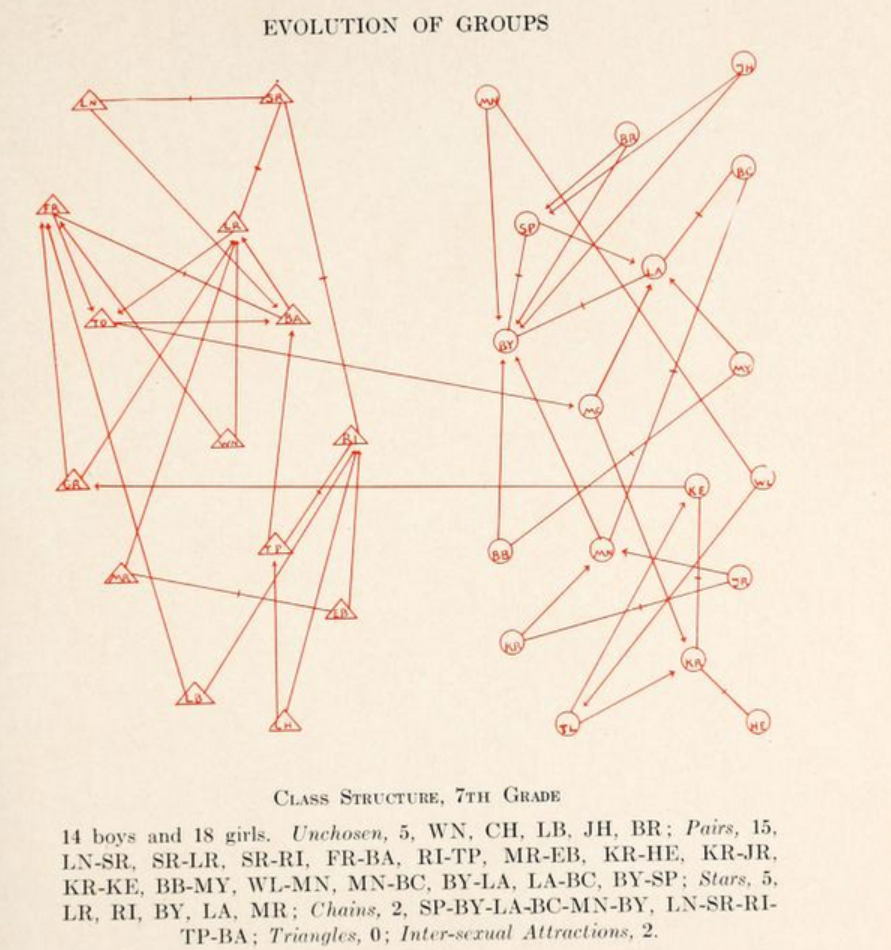

Actualmente, gracias a la tecnología es mucho más fácil recabar información de redes sociales y no sólo podemos ver como una red social a Facebook, Twitter, LinkedIn, Instagram, sino también sitios con interacciones indirectas como Youtube. Estos sitios con interacciones entre usuarios también forman un tipo de forman redes sociales. 

Para iniciar con el análisis de redes, intentaremos cuantificar la importancia de cada nodo de del grafo.

**Medidas de Centralidad**

Las medidas de centralidad intentan capturar el concepto de **importancia** o conectividad de un nodo en una red.

El siguiente grafico muestra la red formada por interacciones entre personajes de Game of Thrones, ¿Cuáles considerarían como los personajes más importantes?

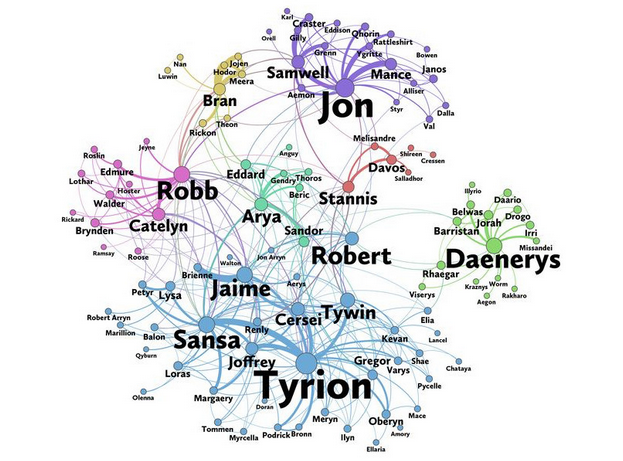

- **Degree**. Es el número de conexiones que tiene un nodo, o de forma equivalente se puede medir como la proporción de los demás nodos a los que está conectado.

$$degree(nodo) = \frac{e}{n-1}$$

donde $e$ es el número de conexiones del nodo y $n$ es el número total de nodos.

- **Betweenness**. Mide la influencia que tiene un nodo sobre el flujo de información en la red.

$$betweenness(nodo) =\sum_{s,t \in V} \frac{\sigma(s, t|nodo)}{\sigma(s, t)}$$
    
donde $V$ es el conjunto de todos los nodos, $\sigma(s, t)$ es el número de los $(s, t)$-caminos más cortos, y  $\sigma(s, t|v)$ es el número de esos caminos que incluyen pasar por el nodo en cuestión diferente a $s, t$.

Si $s = t$, $\sigma(s, t) = 1$, y si $nodo \in {s, t}$, $\sigma(s, t|v) = 0$ 

- **Pagerank**. La importancia de un nodo es el promedio ponderado de los nodos que conectan con él. Esta medida sirve para determinar nodos influyentes en una red. 

La implementación en en el módulo networkx realiza el cálculo de eigenvectores de la matriz de transición por medio del método de la potencia. [power iteration](https://en.wikipedia.org/wiki/Power_iteration) 

- **Closeness**. Es  el inverso del promedio de distancias del nodo a todos los demás. Una interpretación de esta medida es qué tan lejos en promedio están los otros nodos de la red.

$$closeness(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$$

donde $d(v, u)$ es el camino más corto entre $v$ y $u$, y $n$ es el número total de nodos que puede alcanzar $u$.


#### Ejemplo 

Calcular las distintas medidas de centralidad para el siguiente grafo.

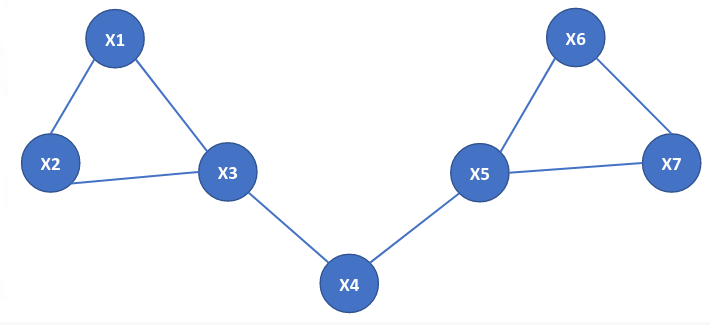

In [1]:
# Importar Librerías

import pandas as pd
import numpy as np
import networkx as nx


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Crear un grafo definiendo las uniones entre nodos

In [3]:
# Inicializar un grafo vacio
G = nx.DiGraph()

G.add_edges_from([('X1', 'X2'), ('X2','X1'),
                  ('X1', 'X3'), ('X3', 'X1'), 
                  ('X2', 'X3'), ('X3', 'X2'),
                  ('X3', 'X4'), ('X4', 'X3'),
                  ('X4', 'X5'), ('X5', 'X4'),
                  ('X5', 'X7'), ('X7', 'X5'),
                  ('X5', 'X6'), ('X6', 'X5'),
                  ('X6', 'X7'), ('X7', 'X6')]) 


In [4]:
print(G.nodes())
print(G.edges())

['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X6']
[('X1', 'X2'), ('X1', 'X3'), ('X2', 'X1'), ('X2', 'X3'), ('X3', 'X1'), ('X3', 'X2'), ('X3', 'X4'), ('X4', 'X3'), ('X4', 'X5'), ('X5', 'X4'), ('X5', 'X7'), ('X5', 'X6'), ('X7', 'X5'), ('X7', 'X6'), ('X6', 'X5'), ('X6', 'X7')]


Obtener el número de nodos y relaciones

In [5]:
print(G.number_of_nodes())
print(G.number_of_edges())

7
16


Notar que al definir de el grafo como se hizo previamente, se generan vínculos dirigidos. ¿Qué tendríamos que modificar para que fuera un grafo no dirigdo?

Visualizar el grafo

/home/leonardo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/leonardo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


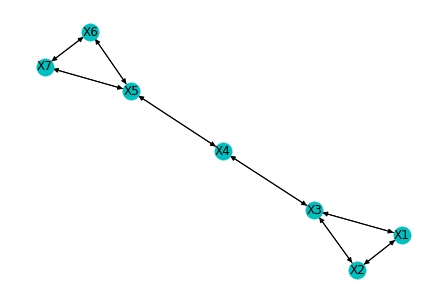

In [6]:
nx.draw(G,node_color='c',edge_color='k', with_labels=True)

Calcular la importancia de cada nodo con las diferentes medidas mencionadas

In [7]:
nx.degree_centrality(G)

{'X1': 0.6666666666666666,
 'X2': 0.6666666666666666,
 'X3': 1.0,
 'X4': 0.6666666666666666,
 'X5': 1.0,
 'X7': 0.6666666666666666,
 'X6': 0.6666666666666666}

In [8]:
nx.betweenness_centrality(G) 

{'X1': 0.0,
 'X2': 0.0,
 'X3': 0.5333333333333333,
 'X4': 0.6,
 'X5': 0.5333333333333333,
 'X7': 0.0,
 'X6': 0.0}

In [9]:
nx.pagerank(G)

{'X1': 0.12734391460303282,
 'X2': 0.12734391460303282,
 'X3': 0.18280387918229035,
 'X4': 0.1250165832232878,
 'X5': 0.18280387918229038,
 'X7': 0.12734391460303285,
 'X6': 0.12734391460303285}

In [10]:
nx.closeness_centrality(G)

{'X1': 0.4,
 'X2': 0.4,
 'X3': 0.5454545454545454,
 'X4': 0.6,
 'X5': 0.5454545454545454,
 'X7': 0.4,
 'X6': 0.4}

utilizando la medida **Degree**, obtenemos que los nodos más importantes en esta red son los nodos X3 y X5 pues son quienes tienen más conexiones. No obstante, podemos notar que el nodo X4 es importante porque es la única conexión entre 2 partes de la red, sin embargo, esto no lo captura la medida de degree.
Utilizando la medida de **Betweeness** notamos que el nodo X4 es el más importante, seguido por los nodo X3 y X5, mientras que los nodos restantes tienen menor relevancia.

**Ejercicio**

Calcular y análizar las medidas de centralidad para el siguiente grafo

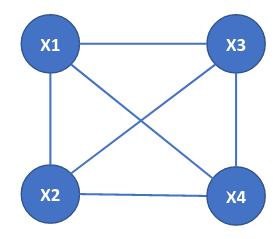

**Ejercicio**. 

En la carpeta datos/sucursales del repositorio se encuentran 2 archivos, un catálogo de todos los municipios del país obtenido a partir de los códigos postales y un archivo con el número de sucursales de cada banco por municipio. 

* Realizar un breve EDA (Exploratory Data Analysis) para entender los datos.

Obtener:
    - Número de municipios en el país
    - Número de municipios que tienen sucursales
    
    - Los 3 bancos con mayor número de sucursales
    - Los 3 bancos con menor número de sucursales.
    
    - Los 3 bancos con presencia en mayor número de municipios.

* ¿Qué banco es el que ayuda a que haya mayor inclusión financiera en el país?, es decir, el banco que tiene sucursales en municipios donde otros no.

Por facilidad considerar lo siguiente, los municipios con una sola sucursal indican presencia de un solo banco ahí. Obtener los 3 principales bancos que cumplen esto. ¿Hay algo que puedas identificar de estos municipios?

* Obtener distintas medidas de centralidad para cada banco. 

In [11]:
# Leer datos
nodos_sucursales = pd.read_excel("/home/leonardo/Documentos/Acatlan/datos/sucursales/nodos_sucursales.xlsx")

In [12]:
# Encabezado
nodos_sucursales.head()

,Source,Target,Type,Weight
0,Banamex,Aguascalientes_Aguascalientes,Undirected,8
1,Banamex,Aguascalientes_Calvillo,Undirected,1
2,Banamex,Baja California_Ensenada,Undirected,4
3,Banamex,Baja California_Mexicali,Undirected,5
4,Banamex,Baja California_Playas de Rosarito,Undirected,1


In [13]:
# Crear grafo vacio
G_sucursales = nx.Graph()

In [14]:
# Iterar sobre los registros para crear las relaciones

for _, edge in nodos_sucursales.iterrows():
    G_sucursales.add_edge(edge['Source'], edge['Target'])

Número de nodos y relaciones

In [15]:
print(G_sucursales.number_of_nodes())
print(G_sucursales.number_of_edges())

957
4321


Cálculo de las medidas de centralidad

**Degree**

In [16]:
degree = nx.degree_centrality(G_sucursales)

In [17]:
# Top 5 
sorted(degree.items(), key=lambda x: x[1], reverse = True)[:5]

[('Banco Azteca', 0.8305439330543932),
 ('BanCoppel', 0.5313807531380753),
 ('BBVA Bancomer', 0.5052301255230125),
 ('Banorte', 0.34623430962343094),
 ('HSBC', 0.3253138075313807)]

In [18]:
# Bottom 5
sorted(degree.items(), key=lambda x: x[1])[:5]

[('Campeche_Hopelchén', 0.0010460251046025104),
 ('Durango_Indé', 0.0010460251046025104),
 ('Durango_Tepehuanes', 0.0010460251046025104),
 ('Guanajuato_Pueblo Nuevo', 0.0010460251046025104),
 ('Guanajuato_Tarandacuao', 0.0010460251046025104)]

In [19]:
np.sum(list(degree.values()))

9.039748953974893

---

**Betweenness**

In [20]:
betweenness = nx.betweenness_centrality(G_sucursales)

In [21]:
# Top 5 
sorted(betweenness.items(), key=lambda x: x[1], reverse = True)[:5]

[('Banco Azteca', 0.5702129376531817),
 ('BBVA Bancomer', 0.15764845598757815),
 ('BanCoppel', 0.1389015094831403),
 ('Banorte', 0.07406503502759322),
 ('HSBC', 0.05527993438061376)]

In [22]:
# Bottom 5
sorted(betweenness.items(), key=lambda x: x[1])[:5]

[('Campeche_Hopelchén', 0.0),
 ('Durango_Indé', 0.0),
 ('Durango_Tepehuanes', 0.0),
 ('Guanajuato_Pueblo Nuevo', 0.0),
 ('Guanajuato_Tarandacuao', 0.0)]

In [23]:
np.sum(list(betweenness.values()))

1.3155819404587143

---

**Pagerank**

In [24]:
pagerank = nx.pagerank(G_sucursales)

In [25]:
# Top 5 
sorted(pagerank.items(), key=lambda x: x[1], reverse = True)[:5]

[('Banco Azteca', 0.1139702688312614),
 ('BanCoppel', 0.0555763870555099),
 ('BBVA Bancomer', 0.05493505412655774),
 ('Banorte', 0.034320538200852506),
 ('HSBC', 0.030791489254211737)]

In [26]:
# Bottom 5
sorted(pagerank.items(), key=lambda x: x[1])[:5]

[('Veracruz de Ignacio de la Llave_Tlacotalpan', 0.00023106741432686617),
 ('Coahuila de Zaragoza_Arteaga', 0.0002323829414610349),
 ('Michoacán de Ocampo_Aquila', 0.0002323829414610349),
 ('Puebla_Juan C. Bonilla', 0.00023474985011165335),
 ('Veracruz de Ignacio de la Llave_Carlos A. Carrillo',
  0.00023474985011165335)]

Recordar que la suma de todos los puntajes asignados a los nodos suman 1

In [27]:
np.sum(list(pagerank.values()))

1.0000000000000013

---

**Closeness**

In [28]:
closeness = nx.closeness_centrality(G_sucursales)

In [29]:
# Top 5 
sorted(closeness.items(), key=lambda x: x[1], reverse = True)[:5]

[('Banco Azteca', 0.7709677419354839),
 ('BanCoppel', 0.5275938189845475),
 ('BBVA Bancomer', 0.5134264232008593),
 ('Guanajuato_León', 0.4997386304234187),
 ('Ciudad de México_Cuauhtémoc', 0.49921671018276764)]

In [30]:
# Bottom 5
sorted(closeness.items(), key=lambda x: x[1])[:5]

[('Chihuahua_Julimes', 0.2503273108143493),
 ('Chihuahua_Rosales', 0.2503273108143493),
 ('Oaxaca_Villa Sola de Vega', 0.25650657365173063),
 ('Veracruz de Ignacio de la Llave_Banderilla', 0.25650657365173063),
 ('Coahuila de Zaragoza_Arteaga', 0.26285400054990377)]

¿Qué métrica elegirías para reforzar tus  hallazgos de la pregunta anterior?